In [1119]:
# Import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [1120]:
# Generate Phantom and Display
    # Parameters:
        # (x,y) resolution
        # Length (real world)
        # attenuation values
def generate_phantom (x,y,length,attenuations):

    # Create phantom matrix, U matrix, L matrix
    phantom = np.zeros((y,x), np.uint8) # phantom image
    U = np.zeros((y,x), np.float32) # attenuation matrix
    L = np.ones((y,x), np.float32) # length matrix
    L = L * length / x # how many cm per pixel


    # Trapezoidal Phantom will have 10 structures
    # Structures will have relative positions
    struct_1 = np.zeros((y,x), np.float32)
    struct_1[int(y*0.300):int(y*0.305),int(x*0.400):int(x*0.600)] = 1

    struct_2 = np.zeros((y,x), np.float32)
    struct_2[int(y*0.305):int(y*0.310),int(x*0.395):int(x*0.605)] = 1

    struct_3 = np.zeros((y,x), np.float32)
    struct_3[int(y*0.310):int(y*0.315),int(x*0.390):int(x*0.610)] = 1

    struct_4 = np.zeros((y,x), np.float32)
    struct_4[int(y*0.315):int(y*0.320),int(x*0.385):int(x*0.615)] = 1

    struct_5 = np.zeros((y,x), np.float32)
    struct_5[int(y*0.320):int(y*0.325),int(x*0.380):int(x*0.620)] = 1

    struct_6 = np.zeros((y,x), np.float32)
    struct_6[int(y*0.325):int(y*0.330),int(x*0.375):int(x*0.625)] = 1

    struct_7 = np.zeros((y,x), np.float32)
    struct_7[int(y*0.330):int(y*0.335),int(x*0.370):int(x*0.630)] = 1
    
    struct_8 = np.zeros((y,x), np.float32)
    struct_8[int(y*0.335):int(y*0.340),int(x*0.365):int(x*0.635)] = 1

    struct_9 = np.zeros((y,x), np.float32)
    struct_9[int(y*0.340):int(y*0.345),int(x*0.360):int(x*0.640)] = 1

    struct_10 = np.zeros((y,x), np.float32)
    struct_10[int(y*0.345):int(y*0.350),int(x*0.360):int(x*0.640)] = 1
    
    
    
    
    
    


    # Add the structures to the phantom
    phantom += struct_1.astype(np.uint8)  + struct_2.astype(np.uint8)  + struct_3.astype(np.uint8)  + struct_4.astype(np.uint8)  + struct_5.astype(np.uint8)  + struct_6.astype(np.uint8)  + struct_7.astype(np.uint8)  + struct_8.astype(np.uint8)  + struct_9.astype(np.uint8)  + struct_10.astype(np.uint8) 
    phantom *= 255
  
    # Write a phantom
    cv2.imwrite("phantom.jpg", phantom)

    # Add structure attenuations to U matrix
    U += struct_1 * attenuations[0] 
#     print(U)
#     print(L)
#     print(phantom)

    return phantom, U, L

In [1121]:
tmp = np.array([[0,1,2],[1,1,1]])
tmp
np.mean(tmp, axis=0)

array([0.5, 1. , 1.5])

In [1122]:
# Create a virtual Sensor, get signal intensities
    # Parameters:
        # Resolution (y)
        # Beam intensity (i_0)
def run_x_ray(sensor_resolution, i_0, U, L):
    # Get Intensities
    x_ray = compute_signal_intensity(i_0, U, L)
    
    # map to sensor resolution
    print(x_ray.shape)
    x_ray = x_ray.reshape(sensor_resolution, U.shape[0]//sensor_resolution)
    print(x_ray.shape)
    x_ray = np.mean(x_ray, axis=1)
    print(x_ray.shape)
    return x_ray

In [1123]:
# Compute the instensity across all layers (using matrix multiplication)
def compute_signal_intensity(i_0, U, L):
    return i_0 * np.prod(np.exp(-1 * np.multiply(U,L)), axis=1)

In [1124]:
# Show the signal profile
    # Parameter:
        # x_ray - array of signal intensities
def show_graphs(x_ray):
    plt.figure(1)
    plt.title("Intensity Points")
    plt.plot(x_ray, 'ro')
    plt.figure(2)
    plt.title("Intensity Graph")
    plt.plot(x_ray)
    plt.figure(3)
    plt.title("Intensity Merged")
    plt.plot(x_ray, 'ro')
    plt.plot(x_ray)
    plt.ylabel('Signal Intensity')
    plt.show()

(256,)
(16, 16)
(16,)


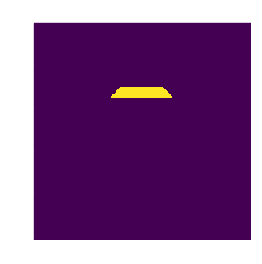

In [1125]:
# Phantom Parameters
x = 256 # pixels
y = 256 # pixels
length = 10 # cm
attenuations = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5] # factor (0-1)

# Get phantom and matrices
phantom, U, L = generate_phantom(x,y,length,attenuations)

# Display phantom
%matplotlib inline
plt.figure(0)
plt.title("Phantom")
plt.imshow(phantom)

# X-Ray parameters
sensor_resolution = 16  # Must be a factor of image size
i_0 = 40  # keV

# Compute x_ray
x_ray = run_x_ray(sensor_resolution, i_0, U, L)


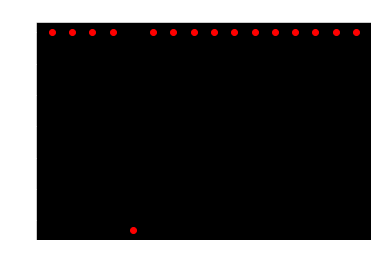

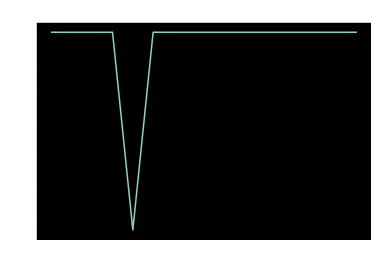

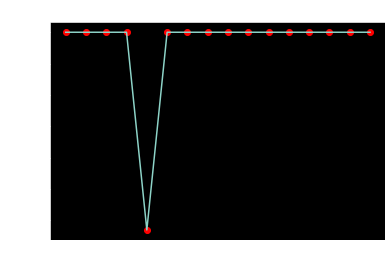

In [1126]:
# Display graphs
show_graphs(x_ray)